# Recommendation Option 4 
### Only using Descriptive Words with Single Value Decomposition

In [1]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np


In [2]:
beers = pd.read_csv('data/corrected_cvec.csv')
beers.drop('Unnamed: 0',axis =1, inplace = True)
beers.head()

,ab,aback,abacus,abandon,abate,abates,abbey,abbeys,abbot,abbreviated,...,zestful,zesty,zilch,zing,zingy,zip,zippy,zombie,zone,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
beer_info = pd.read_csv('data/Beers_U.csv')[['Beer_Name','Brewery_Name','ABV','Type']]
beer_info.head()

,Beer_Name,Brewery_Name,ABV,Type
0,That's What She Said,Tree House Brewing Company,5.60,Milk / Sweet Stout
1,Triple Bag,Long Trail Brewing Co.,11.00,American Strong Ale
2,Great Lakes Devil's Pale Ale,Great Lakes Brewery,6.60,English Pale Ale
3,Hornswoggled,Cigar City Brewing,5.00,Irish Red Ale
4,Schlafly Raspberry Hefeweizen,The Schlafly Tap Room,4.10,Fruit / Vegetable Beer


In [4]:
beer_info['Beer_Name_Full'] = beer_info['Brewery_Name']+' : '+beer_info['Beer_Name']


In [5]:
print(beers.shape)
print(beer_info.shape)

(9490, 11751)
(9490, 5)


In [6]:
# Tegrity check.  just want to do an eyeball comparison of the first observation in each dataframe
beers.iloc[0].sort_values(ascending = False)[:15]

chocolate    37
milk         33
lactose      27
beer         24
stout        23
creamy       21
dark         18
light        18
roast        17
taste        17
head         16
coffee       16
malt         16
good         16
brown        15
Name: 0, dtype: int64

In [7]:
#These values are what I would expect to see in a Milk Stout.

In [8]:
# Manually searched through beer types to remove them I don't want a stout being recommended
# because a stout was the input and the word "stout" was used alot by reviewers when referring to
# "this stout" or "that stout"
beers.columns.contains('weizenbock')

False

In [9]:
['stout','porter','lager','pa',]

['stout', 'porter', 'lager', 'pa']

In [10]:
import pickle
filename = 'data/descriptive_words'
infile = open(filename,'rb')
desc_words = list(pickle.load(infile))
infile.close()

In [11]:
# None was in there for some reason
desc_words.remove(None)

In [12]:
desc_df = pd.SparseDataFrame(beers[desc_words], columns = desc_words)


In [13]:
desc_df.head()

,spicy,quietly,unbidden,gummy,truer,stupendous,adolescent,solid,weirdly,warmish,...,squat,deceptive,spic,savory,joint,desperate,northern,raucous,sparsely,versa
0,1,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4,0,0,0,0,0,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# after exploring, I found out that variance explained drops of after 400 componenets
SVD = TruncatedSVD(n_components=400) 
svd_matrix = SVD.fit_transform(desc_df)
svd_matrix.shape

(9490, 400)

Text(0.5, 1.0, 'Explained variance by component')

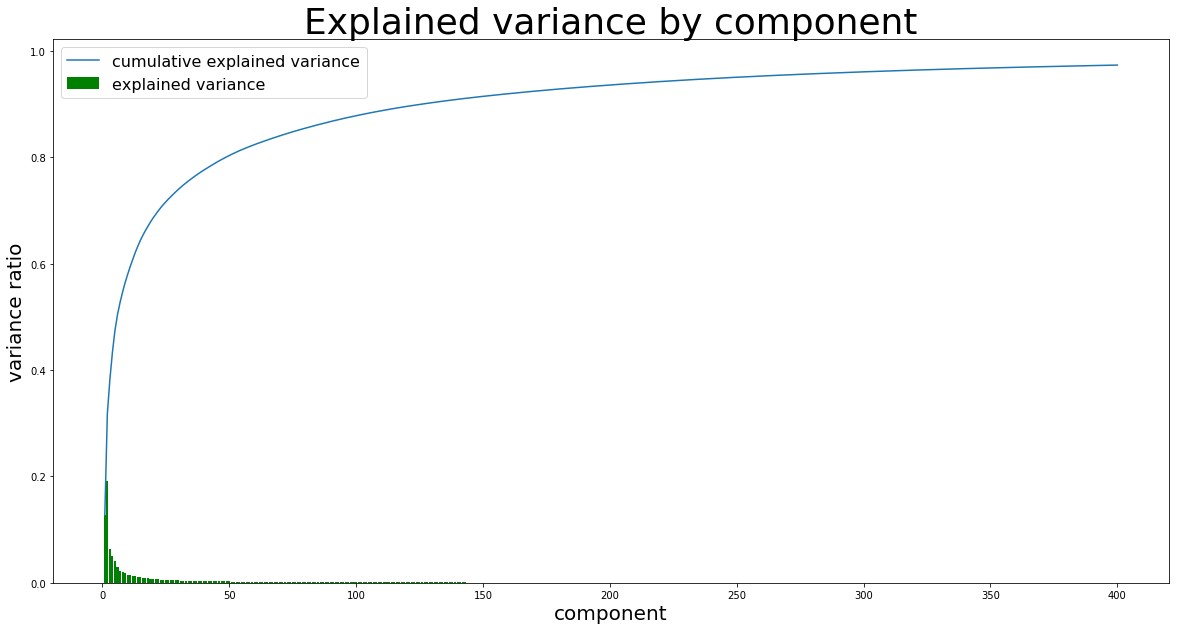

In [15]:
fig = plt.figure(figsize=(20,10))
plt.bar(np.array(range(400))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(400))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend(fontsize=16)
plt.xlabel('component', fontsize=20)
plt.ylabel('variance ratio', fontsize=20)
plt.title('Explained variance by component', fontsize=36)

In [16]:
#Cosign Similarity Matrix
cms = cosine_similarity(svd_matrix, svd_matrix)
cms.shape

(9490, 9490)

In [17]:
search_df = pd.SparseDataFrame(cms, columns = beer_info.Beer_Name_Full,index = beer_info.Beer_Name_Full)
search_df.head()

Beer_Name_Full,Tree House Brewing Company : That's What She Said,Long Trail Brewing Co. : Triple Bag,Great Lakes Brewery : Great Lakes Devil's Pale Ale,Cigar City Brewing : Hornswoggled,The Schlafly Tap Room : Schlafly Raspberry Hefeweizen,Brasserie Ellezelloise : Hercule Stout,Lagunitas Brewing Company : Censored,Brasserie de l'Abbaye des Rocs s.a. : Brasserie Des Rocs Triple Impériale,Cambridge Brewing Company : Arquebus,Temperance Beer Co. : Gatecrasher,...,New Belgium Brewing : Fat Tire Belgian White,3 Floyds Brewing Co. : Necron 99,Bierbrouwerij De Koningshoeven B.V. : Tilburg's Dutch Brown Ale,New Glarus Brewing Company : Laughing Fox,Trillium Brewing Company : Dialed In (w/ Chardonnay & Gewürztraminer Juice),BrewDog : Riptide,Atlantic Brewing Company / Mainely Meat BBQ : New Guy IPA,Les Brasseurs de Gayant : Saint Landelin La Divine,Hill Farmstead Brewery : George,Köstritzer Schwarzbierbrauerei GmbH & Co. : Köstritzer Schwarzbier
Beer_Name_Full,,,,,,,,,,,,,,,,,,,,,
Tree House Brewing Company : That's What She Said,1.000000,0.744964,0.725599,0.668754,0.380110,0.827903,0.651241,0.723139,0.569880,0.632124,...,0.476146,0.602887,0.735732,0.646723,0.506718,0.814205,0.641421,0.622468,0.633054,0.770745
Long Trail Brewing Co. : Triple Bag,0.744964,1.000000,0.821297,0.725775,0.443308,0.780301,0.755673,0.864553,0.686674,0.668512,...,0.551668,0.674460,0.845096,0.743191,0.554793,0.778246,0.695420,0.718173,0.722483,0.784101
Great Lakes Brewery : Great Lakes Devil's Pale Ale,0.725599,0.821297,1.000000,0.692210,0.465788,0.728976,0.786253,0.782450,0.655372,0.753121,...,0.594670,0.656377,0.787152,0.762840,0.586636,0.720779,0.745760,0.742167,0.665331,0.759086
Cigar City Brewing : Hornswoggled,0.668754,0.725775,0.692210,1.000000,0.403261,0.650553,0.754071,0.674827,0.617853,0.600033,...,0.560203,0.635389,0.686315,0.752507,0.548180,0.602847,0.628240,0.680515,0.545892,0.662769
The Schlafly Tap Room : Schlafly Raspberry Hefeweizen,0.380110,0.443308,0.465788,0.403261,1.000000,0.390968,0.462774,0.416340,0.453243,0.449553,...,0.458631,0.421367,0.383606,0.489372,0.426498,0.369894,0.515530,0.487527,0.285010,0.372010


In [18]:
search_df.sort_index(axis =0, inplace = True)
search_df.sort_index(axis =1, inplace = True)

In [19]:
search_df.head()

Beer_Name_Full,(512) Brewing Company : (512) Black IPA,(512) Brewing Company : (512) Bruin,(512) Brewing Company : (512) Cascabel Cream Stout,(512) Brewing Company : (512) IPA,(512) Brewing Company : (512) Pecan Porter,(512) Brewing Company : (512) Whiskey Barrel Aged Double Pecan Porter,(512) Brewing Company : (512) Wit,10 Barrel Brewing Co. : Apocalypse IPA,10 Barrel Brewing Co. : Cucumber Crush,10 Barrel Brewing Co. : DUB Double India Pale Ale,...,pFriem Family Brewers : Pilsner,von Trapp Brewing : Von Trapp Bohemian Pilsner,von Trapp Brewing : Von Trapp Dunkel Lager,von Trapp Brewing : Von Trapp Golden Helles Lager,von Trapp Brewing : Von Trapp India Pale Lager,von Trapp Brewing : Von Trapp Trosten Lager,von Trapp Brewing : Von Trapp Vienna Lager,Žatecký Pivovar : Žatec,Žatecký Pivovar : Žatec Dark Lager,Ölvisholt Brugghús : Lava
Beer_Name_Full,,,,,,,,,,,,,,,,,,,,,
(512) Brewing Company : (512) Black IPA,1.000000,0.727331,0.674064,0.614828,0.861831,0.840921,0.567981,0.653328,0.502972,0.593358,...,0.546278,0.544894,0.740431,0.576640,0.589497,0.806372,0.633404,0.596753,0.791051,0.867005
(512) Brewing Company : (512) Bruin,0.727331,1.000000,0.605461,0.575945,0.797152,0.780385,0.495792,0.562422,0.436955,0.520388,...,0.432999,0.428732,0.787410,0.491088,0.452734,0.811330,0.587937,0.490472,0.835162,0.747520
(512) Brewing Company : (512) Cascabel Cream Stout,0.674064,0.605461,1.000000,0.559729,0.741309,0.751983,0.507065,0.588617,0.475117,0.551339,...,0.468263,0.464527,0.624734,0.500133,0.470322,0.659151,0.565364,0.530328,0.630178,0.730428
(512) Brewing Company : (512) IPA,0.614828,0.575945,0.559729,1.000000,0.692264,0.636484,0.764582,0.876323,0.556045,0.827404,...,0.670447,0.719846,0.659355,0.720553,0.774718,0.670880,0.792949,0.751327,0.608592,0.618222
(512) Brewing Company : (512) Pecan Porter,0.861831,0.797152,0.741309,0.692264,1.000000,0.869011,0.595112,0.670643,0.496801,0.638781,...,0.537321,0.541995,0.799109,0.584167,0.555032,0.851720,0.682024,0.599696,0.845732,0.870600


In [20]:
# Set the full name to the index so it can be use to search.
beer_info.set_index('Beer_Name_Full', inplace = True)

In [45]:
# Pickle dataframe from later
search_df.to_pickle('./Data/modeldata/dataframe_DW_SVD')

In [29]:
def recommend(beer_name, df = search_df, info = beer_info):
    top_ten = df.loc[beer_name].sort_values(ascending = False)[1:11].index
    return info.loc[top_ten].set_index('Beer_Name')

In [30]:
def search_beer(name):
    return beer_info[beer_info.index.str.contains(name,case = False, regex = True)]

### Start from the Bottom
Lets from the bottom of the beer bucket.  Unfortunately, I have a friend who loves Busch Beer (and hates getting iced). Lets see what <strike>crap</strike> _"beers"_ are recommended for him.  



In [31]:
# Find Busch
search_beer('Anheuser-Busch : Busch')

,Beer_Name,Brewery_Name,ABV,Type
Beer_Name_Full,,,,
Anheuser-Busch : Busch Light,Busch Light,Anheuser-Busch,4.10,Light Lager
Anheuser-Busch : Busch Ice,Busch Ice,Anheuser-Busch,5.90,American Adjunct Lager
Anheuser-Busch : Busch Beer,Busch Beer,Anheuser-Busch,4.30,American Adjunct Lager


In [32]:
recommend('Anheuser-Busch : Busch Beer')

,Brewery_Name,ABV,Type
Beer_Name,,,
Miller 64,Miller Brewing Co.,2.80,Light Lager
Natural Light,Anheuser-Busch,4.20,Light Lager
Palma Louca Pale Pilsner,Cervejaria Kaiser,4.50,German Pilsener
Michelob Light,Anheuser-Busch,4.30,Light Lager
Famosa (Gallo),"Cervecería Centro Americana, S.A.",5.00,American Adjunct Lager
Busch Light,Anheuser-Busch,4.10,Light Lager
Miller Lite,Miller Brewing Co.,4.17,Light Lager
Bud Light,Anheuser-Busch,4.20,Light Lager
Lone Star Beer,Pabst Brewing Company,4.65,American Adjunct Lager


In [33]:
# My brother became a hipster in college
recommend('Pabst Brewing Company : Pabst Blue Ribbon (PBR)')

,Brewery_Name,ABV,Type
Beer_Name,,,
Tsingtao,"Tsingtao Brewery Co., Ltd.",4.80,American Adjunct Lager
Natural Ice,Anheuser-Busch,5.90,American Adjunct Lager
Kalik,Commonwealth Brewery Ltd.,5.00,American Adjunct Lager
Baltika #5 Gold,Baltika Breweries,5.30,Euro Pale Lager
Cristal,Union De Cervecerias Peruanas Backus y Johnston,5.00,American Adjunct Lager
Carib Lager,Carib Brewery Limited,5.20,American Adjunct Lager
Quilmes,Cervecería y Maltería Quilmes / Grupo Bemberg,4.90,American Adjunct Lager
Famosa (Gallo),"Cervecería Centro Americana, S.A.",5.00,American Adjunct Lager
Dos Equis Special Lager,"Cervecería Cuauhtémoc Moctezuma, S.A. de C.V.",4.30,American Adjunct Lager


In [34]:
# this ones for you Camouflage
recommend('Anheuser-Busch : Bud Light')

,Brewery_Name,ABV,Type
Beer_Name,,,
Miller 64,Miller Brewing Co.,2.80,Light Lager
Natural Light,Anheuser-Busch,4.20,Light Lager
Busch Light,Anheuser-Busch,4.10,Light Lager
Miller Lite,Miller Brewing Co.,4.17,Light Lager
Heineken Premium Light Lager,Heineken Nederland B.V.,4.20,Light Lager
Coors Light,Coors Brewing Company (Molson-Coors),4.20,Light Lager
Michelob Ultra,Anheuser-Busch,4.20,Light Lager
Budweiser,Anheuser-Busch,5.00,American Adjunct Lager
Corona Light,Grupo Modelo S.A. de C.V.,4.10,Light Lager


### Something a little more traditional.

My data likes Stella Artois.  (I like how The Dude pronounces it 'Stella Arttoes')
Lets see if we can find some similar European Pale Lagers...

In [35]:
# Find Stella
search_beer('Stella Artois')

,Beer_Name,Brewery_Name,ABV,Type
Beer_Name_Full,,,,
Stella Artois : Club De Stella Artois,Club De Stella Artois,Stella Artois,5.90,Euro Pale Lager
Stella Artois : Stella Artois,Stella Artois,Stella Artois,5.00,Euro Pale Lager


In [36]:
recommend('Stella Artois : Stella Artois')

,Brewery_Name,ABV,Type
Beer_Name,,,
Efes Pilsener,Anadolu Efes Brewery,5.00,German Pilsener
Kronenbourg 1664,Brasseries Kronenbourg,5.50,Euro Pale Lager
Straub American Lager,Straub Brewery,4.30,American Adjunct Lager
DAB Original,Dortmunder Actien Brauerei / DAB,5.00,Dortmunder / Export Lager
Birra Moretti,Birra Moretti (Heineken),4.60,Euro Pale Lager
Bavik Pils / Lager,De Brabandere,5.20,German Pilsener
Baltika #7 Export,Baltika Breweries,5.40,Dortmunder / Export Lager
Saranac Bohemian Pilsener,Matt Brewing Company / Saranac Brewery,4.80,Czech Pilsener
Zywiec Beer,Zywiec Breweries PLC (Heineken),5.60,Euro Pale Lager


In [37]:
# Grandma likes Heineken
recommend('Heineken Nederland B.V. : Heineken Pilsener')
# These results are quick interesting.

,Brewery_Name,ABV,Type
Beer_Name,,,
Lawnmower Lager,Caldera Brewing Company,3.90,American Adjunct Lager
Leinenkugel's Original,Jacob Leinenkugel Brewing Company,4.60,American Adjunct Lager
Warsteiner Premium German Pilsener,Warsteiner Brauerei,4.80,German Pilsener
Schlitz Gusto (Classic 1960's Formula),JOS. Schlitz Brewing Co. (Pabst),4.70,American Adjunct Lager
Saranac Kölsch,Matt Brewing Company / Saranac Brewery,5.00,Kölsch
Steinlager,New Zealand Breweries Limited,4.80,Euro Pale Lager
Yuengling Premium Beer,Yuengling Brewery,4.40,American Pale Lager
Henry Weinhard's Private Reserve,Blitz-Weinhard Brewing Co.,4.80,American Pale Lager
DAB Original,Dortmunder Actien Brauerei / DAB,5.00,Dortmunder / Export Lager


### Lets Switch it up!
And look at why this recommended was created.

I have some friends, they really like Jai Alai IPA from Cigar City. I agree with them, its a pretty good.

In [38]:
recommend('Cigar City Brewing : Jai Alai IPA')
# some solid recommendations

,Brewery_Name,ABV,Type
Beer_Name,,,
Hop Henge Experimental IPA,Deschutes Brewery,9.30,American Double / Imperial IPA
Deviant Dale's IPA,Oskar Blues Grill & Brew,8.00,American IPA
White Knuckle Double IPA,Marin Brewing Company,8.00,American Double / Imperial IPA
Stateside IPA,Mikkeller ApS,7.00,American IPA
Apex,Bear Republic Brewing Co.,8.25,American Double / Imperial IPA
Big Eye IPA,Ballast Point Brewing Company,7.00,American IPA
Hop Head Double India Pale Ale,Tree Brewing,8.30,American Double / Imperial IPA
Union Jack IPA,Firestone Walker Brewing Co.,7.50,American IPA
Furious,Surly Brewing Company,6.60,American IPA


In [39]:
recommend('New Belgium Brewing : La Folie')

,Brewery_Name,ABV,Type
Beer_Name,,,
Panil Barriquée (Sour Version),Panil,8.00,Flanders Red Ale
Panil Barriquée (Italy Version),Panil,8.00,Flanders Red Ale
Cuvée Des Jacobins Rouge,Brouwerij Bockor N.V. / Brouwerij Omer Vander ...,5.50,Flanders Red Ale
Barrel Select Batch 1,Captain Lawrence Brewing Co.,7.50,American Wild Ale
Silly Sour,Brasserie de Silly S.A.,5.50,Saison / Farmhouse Ale
The Wanderer,The Bruery,8.00,American Wild Ale
Cascade Sang Rouge,Cascade Brewing / Raccoon Lodge & Brewpub,8.06,American Wild Ale
Oud Bruin,Brouwerij 't Verzet / Café Loca,6.00,Flanders Oud Bruin
La Roja,Jolly Pumpkin Artisan Ales,7.20,American Wild Ale


In [40]:
recommend("New Belgium Brewing : Hop Kitchen - APA (FOCOllaboration W/ Odell Brewing)")


,Brewery_Name,ABV,Type
Beer_Name,,,
Anti-Hero IPA,Revolution Brewing,6.70,American IPA
Great Lakes Commodore Perry IPA,Great Lakes Brewing Co.,7.50,English India Pale Ale (IPA)
Red Chair NWPA,Deschutes Brewery,6.20,American Pale Ale (APA)
Fat Head's Head Hunter IPA,Fat Head's Brewery & Saloon,7.50,American IPA
Nectar IPA,Humboldt Brewing Co.,6.70,American IPA
Fathom India Pale Lager,Ballast Point Brewing Company,7.00,American Double / Imperial Pilsner
Marble IPA,Marble Brewery,6.80,American IPA
Columbus IPA,Columbus Brewing Company,6.30,American IPA
Deviant Dale's IPA,Oskar Blues Grill & Brew,8.00,American IPA


In [41]:
# Sculpin is good but often overpriced (in my opinion)
recommend('Ballast Point Brewing Company : Sculpin IPA')

,Brewery_Name,ABV,Type
Beer_Name,,,
Workhorse IPA,Laurelwood Public House & Brewery,7.50,American IPA
Pliny The Elder,Russian River Brewing Company,8.00,American Double / Imperial IPA
Dreadnaught IPA,3 Floyds Brewing Co.,9.50,American Double / Imperial IPA
Apex,Bear Republic Brewing Co.,8.25,American Double / Imperial IPA
Deviant Dale's IPA,Oskar Blues Grill & Brew,8.00,American IPA
Hop Henge Experimental IPA,Deschutes Brewery,9.30,American Double / Imperial IPA
Lagunitas Sucks (Brown Shugga Substitute Ale),Lagunitas Brewing Company,7.85,American Double / Imperial IPA
Abner,Hill Farmstead Brewery,8.20,American Double / Imperial IPA
Hop Stoopid,Lagunitas Brewing Company,8.00,American Double / Imperial IPA


In [42]:
# A beer that you litterally drink 2-3oz at a time
recommend('Dogfish Head Craft Brewery : 120 Minute IPA')

,Brewery_Name,ABV,Type
Beer_Name,,,
Belzebuth,Brasserie Grain d' Orge (Brasserie Jeanne d'Ar...,13.00,Belgian Strong Pale Ale
Shipyard Smashed Pumpkin (Pugsley's Signature Series),Shipyard Brewing Company,9.00,Pumpkin Ale
Dominion Millennium Ale,Old Dominion Brewing Company,10.50,English Barleywine
Hop Juice Double IPA,Oggi's Pizza & Brewing Co.,9.40,American Double / Imperial IPA
Bavarian-Styled Doppel Weizen,Lagunitas Brewing Company,8.70,Weizenbock
Founders Devil Dancer,Founders Brewing Company,12.00,American Double / Imperial IPA
Scaldis Amber,Brasserie Dubuisson Frères sprl,12.00,Belgian Strong Pale Ale
Drake's Denogginizer,Drake's Brewing Co.,9.75,American Double / Imperial IPA
Marin Star Brew-Triple Wheat Ale,Marin Brewing Company,9.20,Wheatwine


In [43]:
# Beer that made me really like Pale Ales
recommend("BJ's Restaurant & Brewhouse : Piranha Pale Ale")

,Brewery_Name,ABV,Type
Beer_Name,,,
Chesapeake Pale Ale,AleWerks Brewing Company,5.30,American Pale Ale (APA)
IPA,Rubicon Brewing Company,6.50,American IPA
Pipers Pale Ale,Dunedin Brewery,6.00,American Pale Ale (APA)
Piranha Pale Ale,BJ's Chicago Pizza & Brewery Inc.,5.70,American Pale Ale (APA)
Red Racer Classic Pale Ale,Central City Brewers + Distillers,5.00,American Pale Ale (APA)
Dundee Pale Ale,Genesee Brewing Co. / Dundee Brewing Co.,5.30,American Pale Ale (APA)
Poleeko Pale Ale,Anderson Valley Brewing Company,5.00,American Pale Ale (APA)
Back Yard India Pale Ale,Cooperstown Brewing Company,6.10,English India Pale Ale (IPA)
Brooklyn East India Pale Ale,Brooklyn Brewery,6.90,English India Pale Ale (IPA)


In [44]:
# Roommate says this brown ale
recommend('Upslope Brewing Company - Lee Hill : Brown Ale')

,Brewery_Name,ABV,Type
Beer_Name,,,
George,Hill Farmstead Brewery,6.00,American Brown Ale
Peter Brown Tribute Ale,Bear Republic Brewing Co.,6.30,American Brown Ale
Face Down Brown,Telluride Brewing Co.,5.70,American Brown Ale
Baird Angry Boy Brown Ale,Baird Brewing Company / Fishmarket Taproom,6.20,English Brown Ale
Nimbus Nut Brown Ale,Nimbus Brewing Company,5.00,English Brown Ale
The Brown Note,Against The Grain Brewery & Smokehouse,5.00,English Brown Ale
Davy Brown Ale,Figueroa Mountain Brewing Co.,6.00,American Brown Ale
Jackie Brown,Mikkeller ApS,5.90,American Brown Ale
Gnarly Brown,MadTree Brewing,7.00,American Brown Ale
